In [3]:
# pima indians diabetes
"""
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) -- diabetes
"""
names = [
    '# of preganant',
    'Glucose concentration',
    'Blood pressure',
    'Skin fold thinckness',
    '2-hour insulin',
    'BMI',
    'Diabetes pedigree',
    'Age',
    'Result'
]

class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

https://xgboost.readthedocs.io/en/latest/python/python_api.html

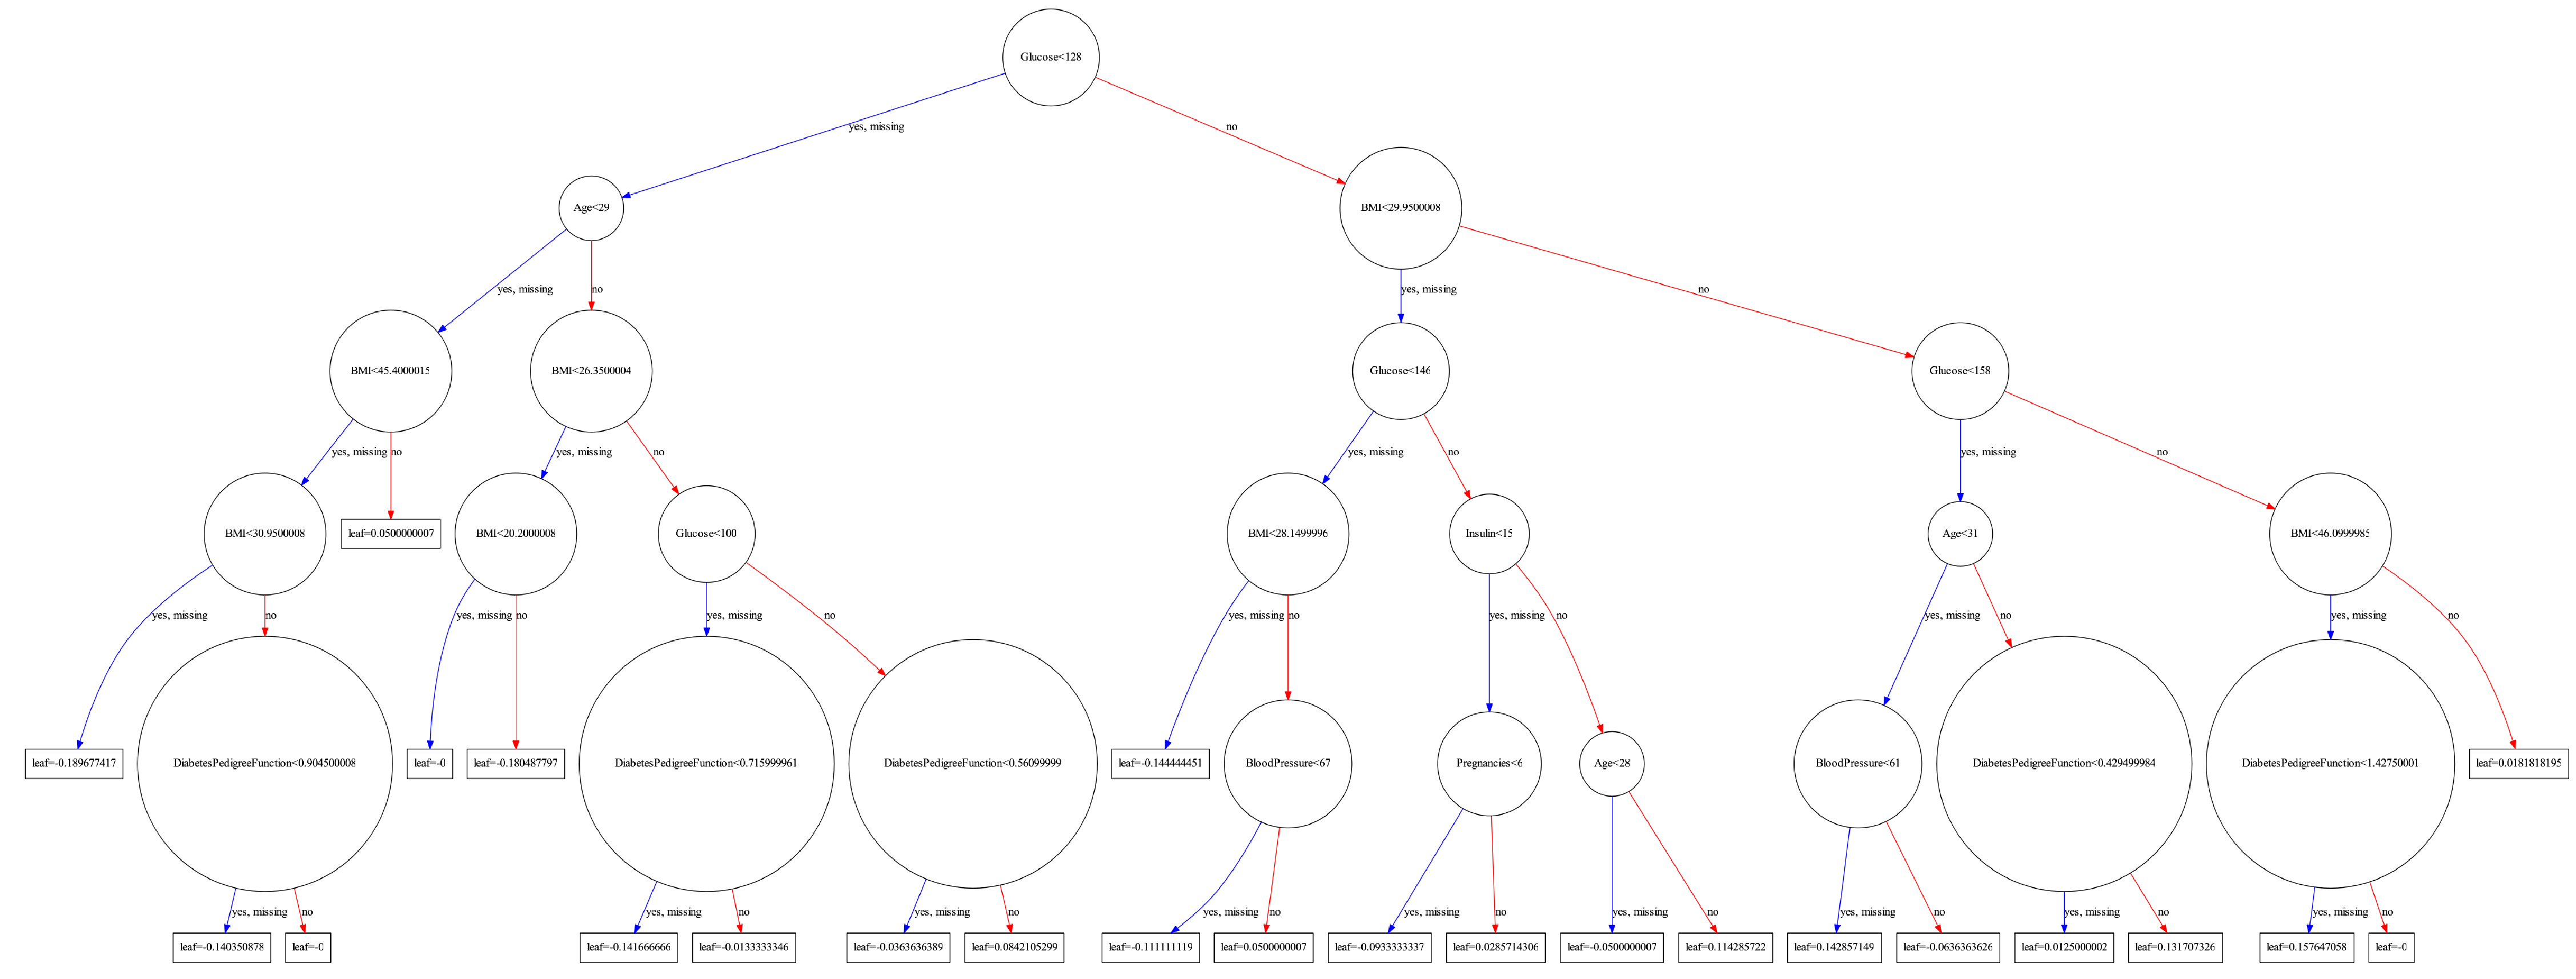

In [4]:
%matplotlib inline
import os
# after pip install graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# plot decision tree
from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 80,100

# load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
dataset = pd.read_csv('diabetes.csv', delimiter=",")

# split data into X and y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

# fit model no training data
model = XGBClassifier(max_depth=5)
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

In [5]:
dataset.iloc[:10,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


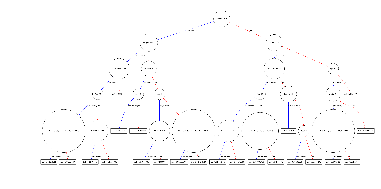

In [6]:
plot_tree(model, num_trees=4)

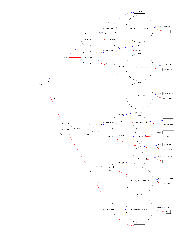

In [7]:
plot_tree(model, num_trees=0, rankdir='LR')

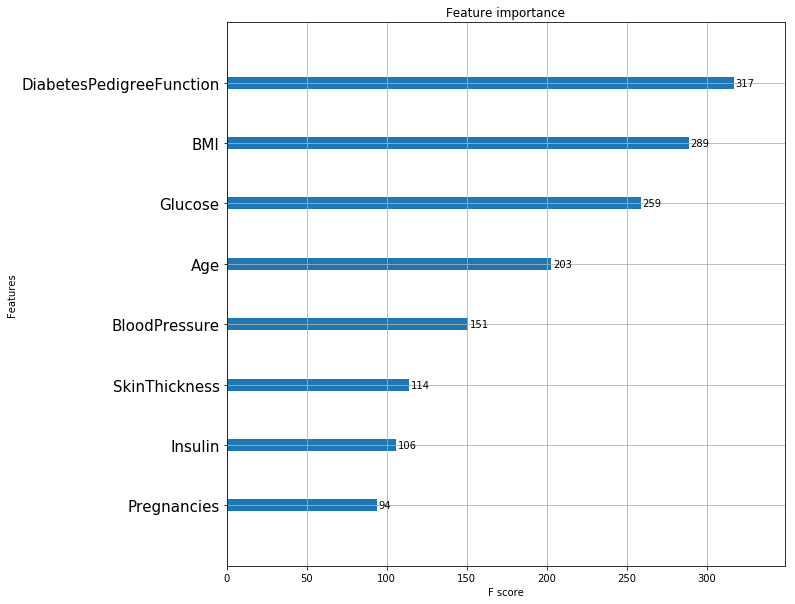

In [8]:
from xgboost import plot_importance
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [9]:
col_name = list(dataset.columns)[:8]
print(col_name)

one = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
one_data = pd.DataFrame(one, index=col_name).T

print(model.predict(one_data))

two = {
    'Pregnancies': [6], 
    'Glucose': [148], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [33.6], 
    'DiabetesPedigreeFunction': [0.627], 
    'Age': [50]
}
two_data = pd.DataFrame(two)

print(model.predict(two_data))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1]
[1]


In [21]:
l = model.predict_proba(two_data)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 15.23%
 Yes diabetes: 84.77%
